# Building a Logistic Regression

Create a logistic regression based on the bank data provided. 

The data is based on the marketing campaign efforts of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Note that the first column of the dataset is the index.

Source: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014


## Import the relevant libraries

In [37]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import seaborn as sns 
sns.set()
from sklearn.linear_model import LogisticRegression


## Load the data

Load the ‘Example_bank_data.csv’ dataset.

In [3]:
raw_data = pd.read_csv('Example_bank_data.csv')
raw_data

,Unnamed: 0,duration,y
0,0,117,no
1,1,274,yes
2,2,167,no
3,3,686,yes
4,4,157,no
...,...,...,...
513,513,204,no
514,514,806,yes
515,515,290,no
516,516,473,yes


We want to know whether the bank marketing strategy was successful, so we need to transform the outcome variable into 0s and 1s in order to perform a logistic regression.

In [11]:
data = raw_data.copy()
data['y']= data['y'].map({'no':0,'yes':1})
data

,Unnamed: 0,duration,y
0,0,117,0
1,1,274,1
2,2,167,0
3,3,686,1
4,4,157,0
...,...,...,...
513,513,204,0
514,514,806,1
515,515,290,0
516,516,473,1


In [14]:
data=data.rename(columns={'y':'cat'})

### Declare the dependent and independent variables

In [21]:
y = data['cat']
x1 = data['duration']

In [18]:
y.shape


(518,)

In [22]:
x1.shape


(518,)

### Simple Logistic Regression

Run the regression and visualize it on a scatter plot (no need to plot the line).

In [23]:
reg = LogisticRegression()
x = sm.add_constant(x1)
log_reg= sm.Logit(y,x)
results = log_reg.fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


In [24]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    cat   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Mon, 05 Jun 2023   Pseudo R-squ.:                  0.2121
Time:                        12:53:51   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

In [25]:
import matplotlib.pyplot as plt 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


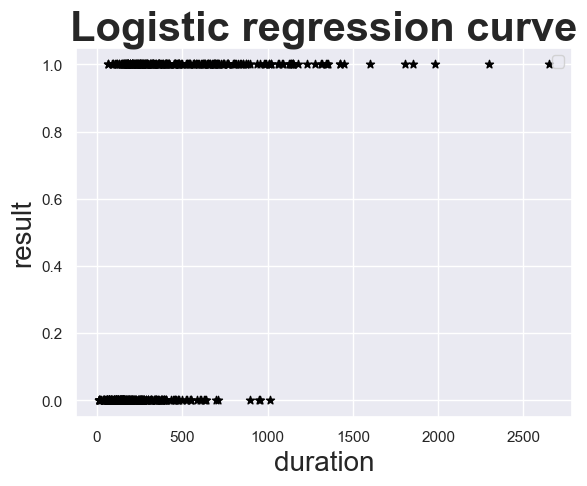

In [36]:


plt.scatter(x1,y, marker ='*', c ='black')

plt.xlabel('duration', fontsize = 20,)
plt.ylabel('result', fontsize=20)


plt.title('Logistic regression curve', fontdict ={'fontweight':'bold','fontsize':30})
plt.legend()
plt.show()

